# Raport z zadania metoda gradientu prostego
## Import bibliotek

In [1]:
from functions import f1, gradient_f1, f2, gradient_f2
from plotter import plotter_1D, plotter_2D, plotter_3D
from gradientdescent import GradientDescent
from experiment import experiment_serie, create_table
import numpy as np

## Wykresy zadanych funkcji

In [ ]:
plotter_1D(f1, domain=(-15, 15), num_points=300, title="$f(x) = \\frac{1}{4}x^4$", x_label='x', y_label='f(x)')

In [ ]:
plotter_2D(f2, domain=[(-3, 3), (-3, 3)], title="$f(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")
plott

# Cel eksperymentów
Zamierzam sprawdzić działanie algorytmów dla różnych punktów startowych oraz hiperparametrów. Przeprowadzę badanie:
- 10 losowo wybranych punktów startowych
- 6 różnych wartości kroku gradientu (step/learning rate)
- 3 różnych liczb iteracji
Spośród wyników dla każdej funkcji wyłonię po dwie najlepsze oraz dwie najgorsze wartości i poddam je dalszej analizie.

## Funkcja 1

/root/WSI/szymczyk_aleksander_wsi23z/Zad1/functions.py:5: RuntimeWarning: overflow encountered in power
  return 1/4 * np.power(x,4)
/root/WSI/szymczyk_aleksander_wsi23z/Zad1/functions.py:9: RuntimeWarning: overflow encountered in power
  return np.power(x, 3)
/root/WSI/szymczyk_aleksander_wsi23z/Zad1/gradientdescent.py:51: RuntimeWarning: invalid value encountered in subtract
  x0 = np.subtract(x0, d * self.step_size)


╒═════════════════════╤═════════════╤════════════════════════╤═══════════════════╤═════════════╤═══════════════╤═══════════════╕
│   Experiment number │   Step size │   Number of iterations │   Starting points │       End x │         End y │   Error value │
╞═════════════════════╪═════════════╪════════════════════════╪═══════════════════╪═════════════╪═══════════════╪═══════════════╡
│                   1 │       0.005 │                   1000 │          1.54515  │   0.309447  │   0.00229238  │     0.309447  │
├─────────────────────┼─────────────┼────────────────────────┼───────────────────┼─────────────┼───────────────┼───────────────┤
│                   2 │       0.005 │                   1000 │          7.58727  │   0.315158  │   0.00246636  │     0.315158  │
├─────────────────────┼─────────────┼────────────────────────┼───────────────────┼─────────────┼───────────────┼───────────────┤
│                   3 │       0.005 │                   1000 │         -3.08894  │  -0.314046  │ 

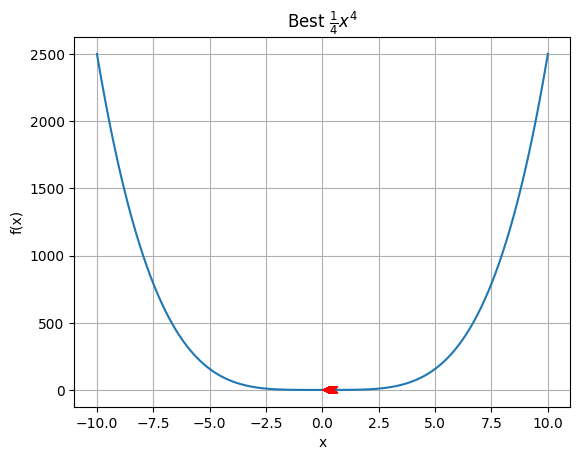

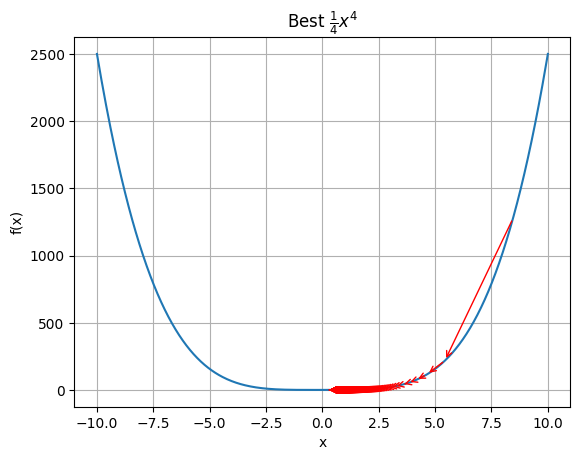

In [2]:
DOMAIN = (-10, 10)
START_POINTS = np.random.uniform(DOMAIN[0], DOMAIN[1], 10)
STEP_SIZES = (0.005, 0.01, 0.03, 0.06, 0.1, 0.2)
ITERATION_NUMBERS = (1000, 5000, 10000)
CORRECT_VALUE = 0
results, best, worst = experiment_serie(START_POINTS, f1, gradient_f1, STEP_SIZES, ITERATION_NUMBERS, CORRECT_VALUE)
table = create_table(*results)
print(table)
plotter_1D(f1, DOMAIN, best[0], best[1], num_points=500, title="Best $\\frac{1}{4}x^4$", x_label="x", y_label="f(x)", steps=True)
plotter_1D(f1, DOMAIN, worst[0], worst[1], num_points=500, title="Worst $\\frac{1}{4}x^4$", x_label="x", y_label="f(x)", steps=True)


## Funkcja 2

╒═════════════════════╤═════════════╤════════════════════════╤═══════════════════════════╤═══════════════════════════╤══════════╤═══════════════╕
│   Experiment number │   Step size │   Number of iterations │ Starting points           │ End x                     │    End y │   Error value │
╞═════════════════════╪═════════════╪════════════════════════╪═══════════════════════════╪═══════════════════════════╪══════════╪═══════════════╡
│                   1 │       0.005 │                   1000 │ [-1.90702442  0.00914123] │ [-0.06806956 -0.00411834] │ 0.501664 │    0.068194   │
├─────────────────────┼─────────────┼────────────────────────┼───────────────────────────┼───────────────────────────┼──────────┼───────────────┤
│                   2 │       0.005 │                   1000 │ [-3.17321892 -3.62708641] │ [-3.17321888 -3.6270864 ] │ 1.5      │    4.81924    │
├─────────────────────┼─────────────┼────────────────────────┼───────────────────────────┼───────────────────────────┼──────

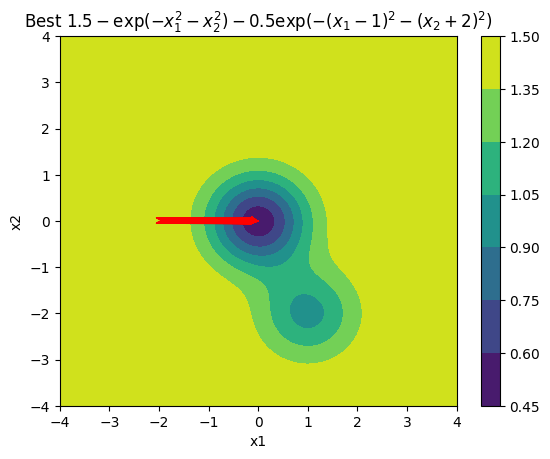

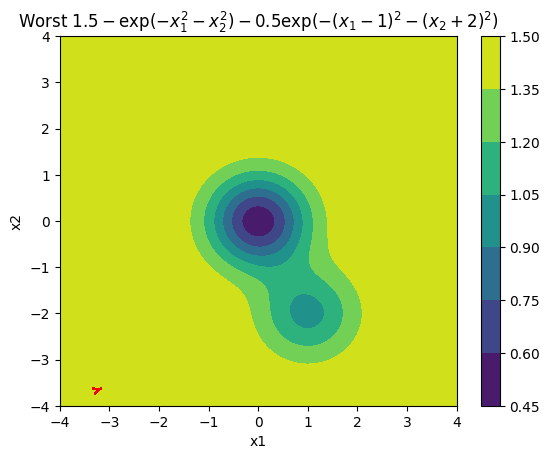

In [2]:
DOMAIN = [(-4, 4), (-4, 4)]
START_POINTS = []
for _ in range(10):
    x1 = np.random.uniform(DOMAIN[0][0], DOMAIN[0][1])
    x2 = np.random.uniform(DOMAIN[1][0], DOMAIN[1][1])
    START_POINT = np.array([x1, x2])
    START_POINTS.append(START_POINT)
STEP_SIZES = (0.005, 0.01, 0.03, 0.06, 0.1, 0.2)
ITERATION_NUMBERS = (1000, 5000, 10000)
CORRECT_VALUE = [0, 0]
results, best, worst = experiment_serie(START_POINTS, f2, gradient_f2, STEP_SIZES, ITERATION_NUMBERS, CORRECT_VALUE)
table = create_table(*results)
print(table)
plotter_2D(f2, DOMAIN, best[0], num_points=500, title="Best $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", steps=True)
plotter_2D(f2, DOMAIN, worst[0], num_points=500, title="Worst $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", steps=True)

# Wnioski
### Funkcja 1
### Funkcja 2